# Beam Analysis with Sympy
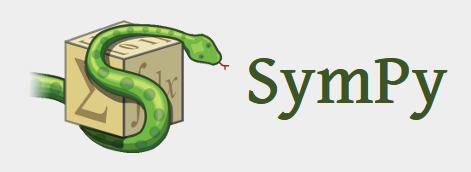

## About `sympy`

`sympy` (pronounced "sim-pai") is a powerful computational algebraic solver that can do many of the things you can expect from commercial software such as Wolfram and Mathematica. Similar to Wolfram Alpha, sympy has its own similar free service called Sympy Gamma: https://www.sympygamma.com/. 

Sympy works by allowing you to define some variables as algebraic symbols and then compose those symbols into expressions that can then be transformed or solved in some way. It can simplify expressions, perform symbolic (multi-variate) differentiation and integration, solve ordinary and partial differential equations, and more. 

You can read about its features here: https://www.sympy.org/en/features.html

## Sympy `beam` module

In addition to all of its other features, `sympy` also allows you to perform elastic beam analysis using direct integration, thereby giving you exact answers (as opposed to FEM approximations).

The sympy beam module allows for quick input of beam information and has built-in plotting capabilities.

Here is the full beam module documentation: https://docs.sympy.org/latest/modules/physics/continuum_mechanics/beam.html

# Getting started

## Basic example

```python
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

E, I = symbols("E I")
R1, R2, R3 = symbols("R1 R2 R3")
my_beam = Beam(6, E, I)

my_beam.apply_load(600, 0, 0, 6)
my_beam.apply_load(R1, 1, -1) # R1 @ 0.8, point load reaction
my_beam.apply_load(R2, 4, -1) # R2 @ 4.2, point load reaction
my_beam.apply_load(R3, 5, -1) # R3 @ 5.7, point load reaction

my_beam.bc_deflection = [(1, 0), (4, 0), (5, 0)]

my_beam.solve_for_reaction_loads(R1, R2, R3)

print(my_beam.reaction_loads)
my_beam.plot_shear_force()
my_beam.plot_bending_moment()
my_beam.plot_deflection(subs={E: 1000, I: 50})
```

# Breaking it down...

## 1. Imports

```python
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols
```

## 2. Define your "symbols"

```python
E, I = symbols("E I") # E and I can be unknowns if solving for shear and moment only
R1, R2, R3 = symbols("R1 R2 R3") # Our unknown reactions as algebraic symbols
```

## 3. Create your `Beam` object

```python
my_beam = Beam(6, E, I)
```

A `Beam` object, takes three _parameters_:

1. `L` (length, in whatever units you wish)
2. `E` (elastic modulus, can either be a symbol or a number)
3. `I` ($I_z$, can either be a symbol or a number)


**Note**
When using numbers for `L`, `E`, and `I`, you have to keep your unit scaling consistent. If, for example, you are entering units of L as inches then your E and I must also be in terms of inches.

Similarily, if entering L in meters then your E and I must also be in terms of meters.

## 4. Apply loads

```python
my_beam.apply_load(500, 0, 0, 6) # 500 UDL starting at 0 and ending at 6
```

### How does this work?

`.apply_load()` takes three (or four) _parameters_:

1. `value` (magnitude; use a number if known, a symbol if unknown)
2. `start` (location on beam; any number within $ 0 \leq x \leq L$)
3. `order` (a number representing the dimension of the load, see below)
4. `[end]` (optional, location on beam; any number within $ start \leq x \leq L$). For distributed loads, if `end` is not given, the load will continue from `start` to the end of the beam.

**Note** `end` only applies to loads with order $\geq$ 0 since point loads and moments only occur at one location. See below.

#### Order of load

From the sympy beam documentation: 

> The value inserted should have the units [Force/(Distance**(n+1)] where n is the order of applied load.

> 
> * For moments, order = -2
> * For point loads, order =-1
> * For constant distributed load, order = 0
> * For ramp loads, order = 1
> * For parabolic ramp loads, order = 2
> * … so on.

## 5. Apply reactions

### Use `.apply_loads()` with symbols (unknowns) as magnitudes

```python
my_beam.apply_load(R1, 0.8, -1) # R1 @ 0.8, point load reaction
my_beam.apply_load(R2, 4.2, -1) # R2 @ 4.2, point load reaction
my_beam.apply_load(R3, 5.7, -1) # R3 @ 5.7, point load reaction
```

### Add boundary conditions

If you are analyzing an indeterminate beam, you _must_ supply appropriate boundary conditions in addition to using `.apply_load()` for your unknowns. 

While you do not _need_ to supply boundary conditions for determinate beams, it is good practice to always do so (best to create a consistent process).

```python
# Supports @ 0.8, 4.7, and 5.2 have zero deflection
my_beam.bc_deflection = [(0.8, 0), (4.2, 0), (5.7, 0)]
```

Note, you can also add slope boundary conditions for fixed supports, etc.

```python
# For example
my_beam.bc_slope = [(0, 0)] # Zero slope at x=0
```

So, if you were creating a fixed support, it would look like this:

```python
my_beam.bc_slope = [(0, 0)] # Zero slope at x=0
my_beam.bc_deflection = [(0, 0)] # Zero deflection at x=0
```

## 6. Solve for reactions

```python
my_beam.solve_for_reaction_loads(R1, R2, R3)
```

You must put the unknown reaction symbols as parameters to `.solve_for_reaction_loads()`

## 7. Show results

There are many results you can review now that the beam is solved:

* `my_beam.reaction_loads`
* `my_beam.plot_shear_force()`
* `my_beam.plot_bending_moment()`
* `my_beam.plot_deflection(subs={E: 1000, I: 50})`

With `.plot_deflection()`, you must provide values for both `E` and `I`. You can use the `subs` parameter to substitute values in for your `E` and `I` symbols if you used symbols in your original `Beam()` definition.
